# Positive-negative-controversial categories

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
reviews_df = pd.DataFrame.from_csv('ratings_grouped_unstack.csv')

# Small set for testing
reviews_df_small = reviews_df.head(100)

In [68]:
reviews_df_small.head(4)

,1,2,3,4,5
asin,,,,,
000100039X,6,4,8,15,173
0001055178,0,4,2,10,2
0001473123,1,0,0,2,13
0001473727,0,0,0,0,7


Stats calculation function:

In [72]:
def calculate_stats(df,index):
    ratings = []
    for ii in range(1,6):
        ratings = ratings + int(df.loc[index][str(ii)])*[ii]
    return np.mean(ratings),np.median(ratings),np.std(ratings)

### First test on small data set:

In [73]:
reviews_df_small = reviews_df_small.assign(mean = np.nan, median = np.nan, std_dev = np.nan)

for index in reviews_df_small.index:
    mean,median,std_dev = calculate_stats(reviews_df_small,index)
    reviews_df_small.at[index,'mean'] = mean
    reviews_df_small.at[index,'median'] = median
    reviews_df_small.at[index,'std_dev'] = std_dev
    
reviews_df_small.head()

,1,2,3,4,5,mean,median,std_dev
asin,,,,,,,,
000100039X,6,4,8,15,173,4.674757,5.0,0.873584
0001055178,0,4,2,10,2,3.555556,4.0,0.955814
0001473123,1,0,0,2,13,4.625000,5.0,0.992157
0001473727,0,0,0,0,7,5.000000,5.0,0.000000
0001473905,0,0,1,0,5,4.666667,5.0,0.745356


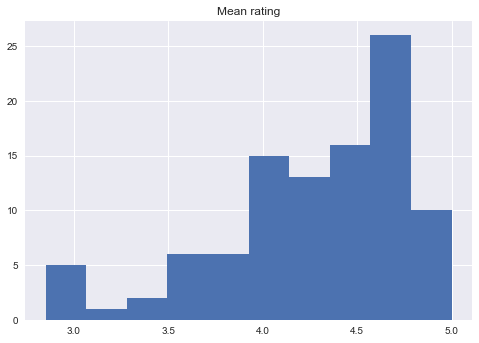

In [217]:
plt.hist(reviews_df_small['mean'])
plt.title('Mean rating')
plt.show()

### Then run on complete data set:

In [79]:
reviews_df = reviews_df.assign(mean = np.nan, median = np.nan, std_dev = np.nan)

for index in reviews_df.index:
    mean,median,std_dev = calculate_stats(reviews_df,index)
    reviews_df.at[index,'mean'] = mean
    reviews_df.at[index,'median'] = median
    reviews_df.at[index,'std_dev'] = std_dev
    
reviews_df.head()

,1,2,3,4,5,mean,median,std_dev
asin,,,,,,,,
000100039X,6,4,8,15,173,4.674757,5.0,0.873584
0001055178,0,4,2,10,2,3.555556,4.0,0.955814
0001473123,1,0,0,2,13,4.625000,5.0,0.992157
0001473727,0,0,0,0,7,5.000000,5.0,0.000000
0001473905,0,0,1,0,5,4.666667,5.0,0.745356


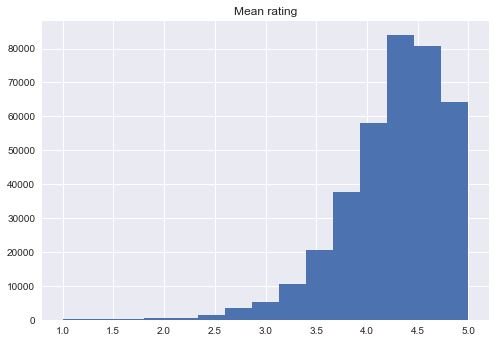

In [218]:
plt.hist(reviews_df['mean'],bins=15)
plt.title('Mean rating')
plt.show()

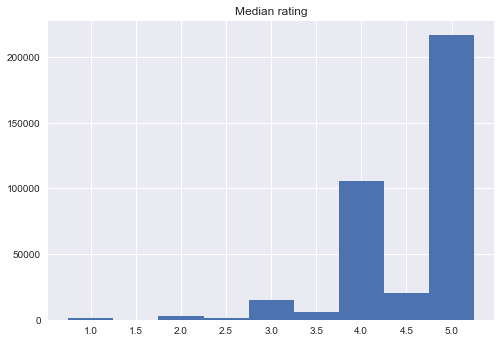

In [219]:
binrange = np.arange(1.0,6.0,0.5) # last bin needs to be from 5 to 5.5
plt.hist(reviews_df['median'],bins=binrange,align='left')
plt.title('Median rating')
plt.xticks(np.arange(1.0,5.5,0.5))
plt.show()

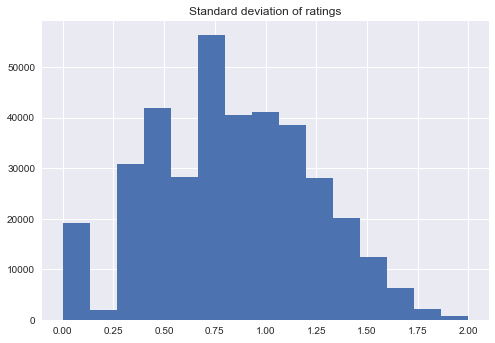

In [220]:
plt.hist(reviews_df['std_dev'],bins=15)
plt.title('Standard deviation of ratings')
plt.show()

In [207]:
np.percentile(sorted(list(reviews_df['mean'])),100.0/3.0)

4.1333333333333337

In [208]:
np.percentile(sorted(list(reviews_df['mean'])),200.0/3.0)

4.5454545454545459

In [225]:
np.percentile(sorted(list(reviews_df['std_dev'])),50)

0.81792026585828903